Saving hw4_data.csv to hw4_data (1).csv
True Positives (TP): 26
False Positives (FP): 3
True Negatives (TN): 150
False Negatives (FN): 21
Precision: 0.8966
Recall: 0.5532


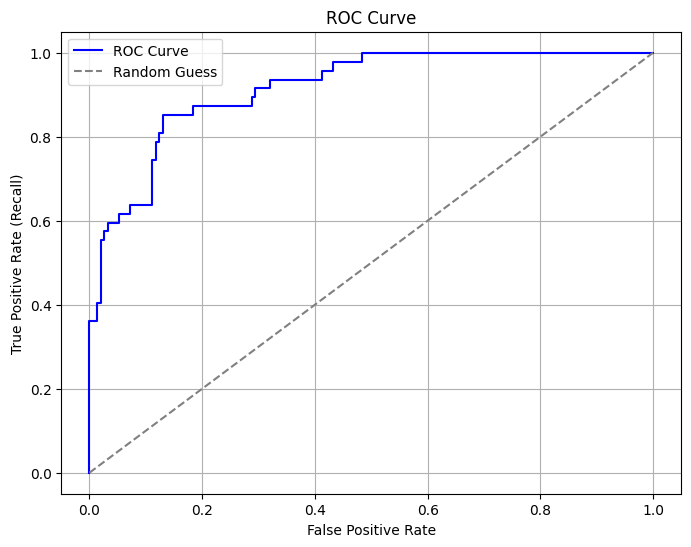

Minimum False Positive Rate for at least 90% recall: 0.2941


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#load dataset
from google.colab import files
uploaded=files.upload()

file_name=list(uploaded.keys())[0]
df= pd.read_csv(file_name)

# extract columns
model_output = df['model_output'].to_numpy()
y_pred = df['prediction'].to_numpy()
true_class = df['true_class'].to_numpy()

# Compute confusion matrix components
TP =np.sum((y_pred == 1) & (true_class == 1))
FP =np.sum((y_pred == 1) & (true_class == 0))
TN =np.sum((y_pred == 0) & (true_class == 0))
FN =np.sum((y_pred == 0) & (true_class == 1))

# Compute precision and recall
precision = TP / (TP+FP) if (TP+FP) > 0 else 0
recall = TP / (TP+FN) if (TP+FN) > 0 else 0

# Print results
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(true_class, model_output)
# plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='gray',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# minimum false positive rate while maintaining at least 90% recall
valid_indices = np.where(tpr>=0.90)[0]
min_fpr = np.min(fpr[valid_indices]) if valid_indices.size > 0 else None
print(f"Minimum False Positive Rate for at least 90% recall: {min_fpr:.4f}")
